In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from tqdm.notebook import tqdm

In [2]:
data = np.loadtxt('features.txt')
data.shape

(1000, 7)

  0%|          | 0/8 [00:00<?, ?it/s]

c:\Users\alex\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\alex\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\alex\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\alex\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

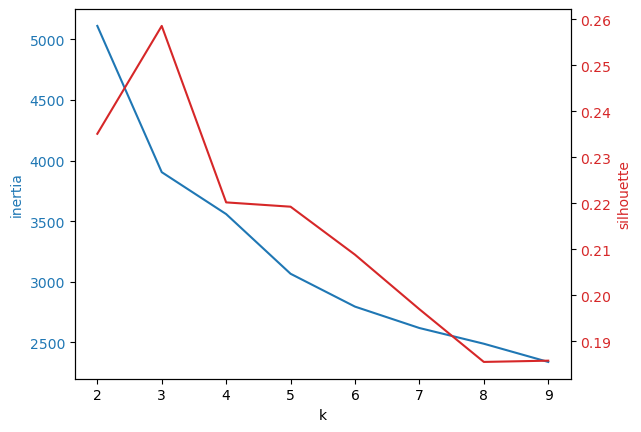

In [3]:
ks = []
inertias = []
silhouettes = []
for i in tqdm(range(2, 10)):
    model = KMeans(n_clusters=i,
                   init='k-means++',
                   n_init='auto',
                   random_state=0)
    label = model.fit_predict(data)
    ks.append(i)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data, label))

ax1 = plt.subplot()
ax1.plot(ks, inertias, color='tab:blue')
ax1.set_xlabel('k')
ax1.set_ylabel('inertia', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(ks, silhouettes, color='tab:red')
ax2.set_ylabel('silhouette', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()

In [4]:
# Choose the number of clusters according to the elbow method
n_clusters = 3
model = KMeans(n_clusters=n_clusters,
               init='k-means++',
               n_init='auto',
               random_state=0)
labels = model.fit_predict(data)

c:\Users\alex\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


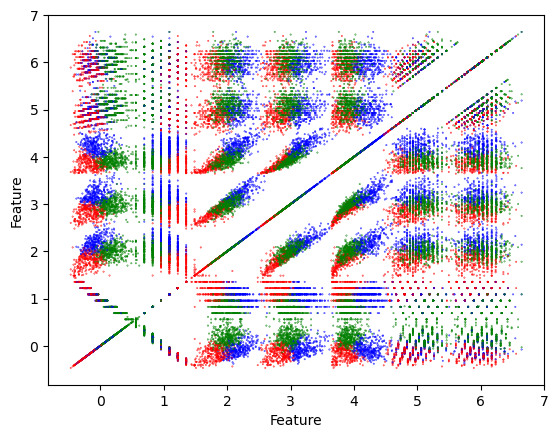

In [5]:
cmap = mcolors.ListedColormap(['r', 'g', 'b'])

for i, j in np.ndindex((7, 7)):
    plt.scatter(data[:, i]/5+i, data[:, j]/5+j,
                s=0.1, c=labels, cmap=cmap)

plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

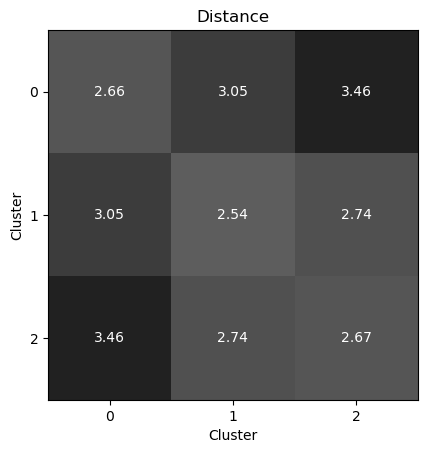

In [6]:
# Calculate the inter-cluster distance and the intra-cluster distance
distance_matrix = pairwise_distances(model.cluster_centers_)
for i in range(n_clusters):
    distance_matrix[i, i] = pairwise_distances(
        data[labels == i], data[labels == i]).mean()

ax = plt.subplot()
ax.imshow(distance_matrix, vmin=0,
          vmax=4, cmap='binary')

for i, j in np.ndindex((n_clusters, n_clusters)):
    ax.text(i, j, f'{distance_matrix[i, j]:.2f}',
            ha='center', va='center', color='w')

ax.set_xticks(np.arange(n_clusters))
ax.set_yticks(np.arange(n_clusters))
ax.set_xlabel('Cluster')
ax.set_ylabel('Cluster')
ax.set_title('Distance')

plt.show()